## Finding delta V required to go into orbit

In [1]:
# for Earth
G = 6.57*10^-11
M = 5.97*10^24
u = G*M

### Velocity in Circular Orbit

In [2]:
r = 6.678*10^6
v = sqrt(u*(1/r))
print("Initial Velocity:\t", v)

Initial Velocity:	 7663.84377109221


### Velocity in Geostationary Transfer Orbit

In [3]:
# desired radius, apo
r1 = 4.216*10^7
# current radius, per
r2 = r
# semi-major axis
a = (r1 + r2)/2

# velocity at both points
v_a = sqrt(u*((2/r1) - (1/a)))
v_p = sqrt(u*((2/r2) - (1/a)))

print("Velocity Apoapsis:\t", v_a)
print("Velocity Periapsis:\t", v_p)
print("Detla V:\t\t", (v_p - v))

Velocity Apoapsis:	 1595.06659256569
Velocity Periapsis:	 10070.0819919990
Detla V:		 2406.23822090680


### Velocity in Geostationary Orbit

In [4]:
v_geo = sqrt(u*(1/a))
print("Velocity Geo:\t", v_geo)
print("Delta V:\t\t", v_geo - v_a)

Velocity Geo:	 4007.79881853306
Delta V:		 2412.73222596737


In [5]:
deltav = (v_p - v) + (v_geo - v_a)
print("Total Delta V:\t", deltav)

Total Delta V:	 4818.97044687417


### Orbital Period

In [6]:
T = 2*pi*sqrt(r1^3/u)
print("Period: \t", float(T/3600))

Period: 	 24.12450553000498


### Graph of Orbit

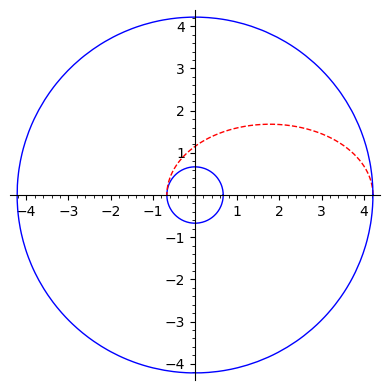

In [36]:
def korbit(r1, r2, x):
    """finds elliptical orbit given r1, r2
    r1: per
    r2: apo
    """
    
    c = (r2 - r1)/2
    a = (r2 + r1)/2
    e = c/a
    
    r = a*(1-e^2)/(1+e*cos(x))
    return r


theta = var('theta')

# earth plot if wanted
r_earth = 6.3781*10^6
earth = circle((0,0), r_earth, rgbcolor=(0,1,0), fill="true")

initial = polar_plot(korbit(r, r,theta), (theta, 0, 2*pi))
transfer = polar_plot(korbit(r1, r, theta), (theta, 0, pi), rgbcolor=(1,0,0), linestyle="--")
final = polar_plot(korbit(r1, r1, theta), (theta, 0, 2*pi))

show(initial+transfer+final)